In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import string
from pythainlp.tokenize import word_tokenize
import re
import matplotlib.font_manager as fm
from pathlib import Path
import urllib.request

pd.set_option("max_colwidth", 0)

In [ ]:
def install_thai_font():
    font_dir = Path.home() / '.fonts'
    font_dir.mkdir(exist_ok=True)
    font_path = font_dir / 'THSarabunNew.ttf'
    
    if not font_path.exists():
        print("Downloading TH Sarabun New font...")
        url = "https://github.com/Phonbopit/sarabun-webfont/blob/master/fonts/thsarabunnew-webfont.ttf"
        urllib.request.urlretrieve(url, font_path)
        
        fm._rebuild()
        print("Font installed successfully!")
    else:
        print("Font already installed.")

install_thai_font()

plt.rcParams['font.family'] = 'TH Sarabun New'
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

Font already installed.


In [42]:
df=pd.read_csv("datasets/dataset1.csv")

In [43]:
display(df.shape)
df.head()

(23545, 3)

,category,texts,length
0,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,9
1,neg,เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ตโครตห่วยยิ่งดึกๆเน็ตยิ่งห่วยตอนมาติดตั้งใหม่ๆก็ดีนานๆไปเเย่ขึ้นเรื่อยๆกากกว่าเน็ตค่ายอื่นอ่ะบอกจริงไม่สนหรอกว่าจะเป็นเด็กเเล้วเม้นด่าเเบบนี้ เเต่นี้หาตังค์จ่ายค่าเน็ตมาตลอดเหนื่อยน่ะเล่นเกมส์ไปเดี่ยวก็หายกากเกินติดตั้งโปรพิเศษ100Mเเต่พอวัดดูปล่อยไม่ถึงเท่าที่ตกลงกันไว้พอโทรไปเเจ้งก็ปล่อยมาเต็มไม่กี่วันก็เหมื่อนเดิมใบเเจ้งก็มาย้อนหลัง3เดือนทุกครั้งห่วยไปน่ะบางทีโปร100M/700 กว่าบาทเเต่คุณภาพเเย่เสียดายตังค์,127
2,neg,เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ,11
3,neg,ลิปมันของเเบร์น Mistine ราคากลาง ๆ ไม่แพงมาก ราคาสามารถเอื้อมถึงได้ #LASHESactivity,23
4,neg,ทำไมมันไม่มีโปรให้เร๊าาาาาา,7


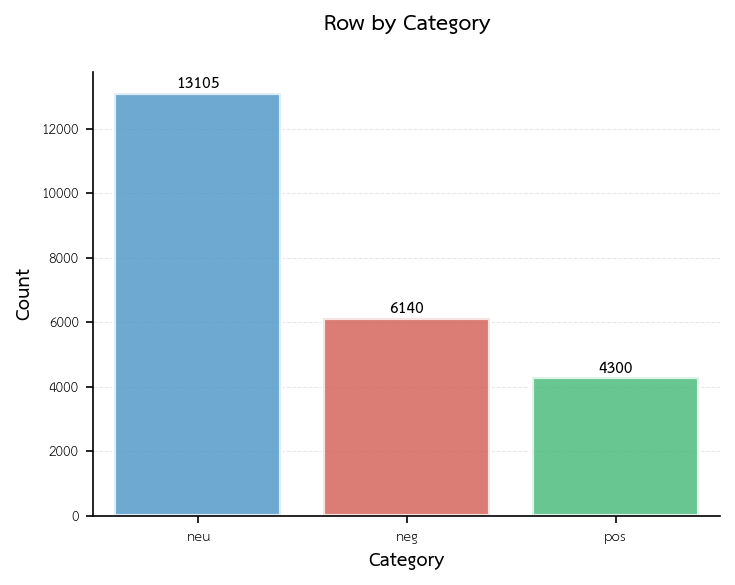

In [44]:
count_data = df.category.value_counts().reset_index()
count_data.columns = ['category', 'count']

fig, ax = plt.subplots(figsize=(5, 4), dpi=150)

sns.barplot(
    data=count_data,
    x='category',
    y='count',
    palette=['#3498db', '#e74c3c', '#2ecc71'],
    hue= 'category',
    alpha=0.8,
    edgecolor='white',
    linewidth=2,
    ax=ax,
    legend=False
)

ax.set_xlabel('Category', fontsize=13, fontweight='bold')
ax.set_ylabel('Count', fontsize=13, fontweight='bold')
ax.set_title('Row by Category', fontsize=15, fontweight='bold', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

for i, row in count_data.iterrows():
    ax.text(i, row['count'] + 50, str(row['count']), 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    df["texts"], 
    df["category"], 
    test_size=0.20, 
    random_state=42, 
    stratify=df["category"])

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18836,), (4709,), (18836,), (4709,))

In [47]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return [word for word in word_tokenize(nopunc) if word and not re.search(pattern=r"\s+", string=word)]

In [48]:
class_names = np.unique(df.category).tolist()

## Multinomial Naive Bayes

In [49]:
text_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=process_text, ngram_range=(1,2),token_pattern=None)),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB(alpha=0.001)),
])

text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

0.6619239753663199

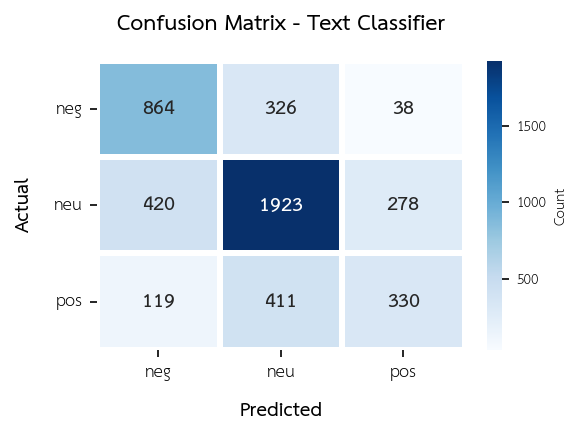

In [50]:
y_pred = text_clf.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'})

plt.ylabel("Actual", fontsize=13, fontweight='bold', labelpad=10)
plt.xlabel("Predicted", fontsize=13, fontweight='bold', labelpad=10)
plt.title("Confusion Matrix - Text Classifier", fontsize=15, fontweight='bold', pad=15)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [51]:
print("Results for Naive Bayes Classifier:")
print(classification_report(y_test, y_pred, target_names=class_names))

Results for Naive Bayes Classifier:
              precision    recall  f1-score   support

         neg       0.62      0.70      0.66      1228
         neu       0.72      0.73      0.73      2621
         pos       0.51      0.38      0.44       860

    accuracy                           0.66      4709
   macro avg       0.62      0.61      0.61      4709
weighted avg       0.66      0.66      0.66      4709



## Linear SVC

In [52]:
svc_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=process_text, ngram_range=(1,2), token_pattern=None)),
    ("tfidf", TfidfTransformer()),
    ("clf", LinearSVC()),
])

svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.7258441282650244

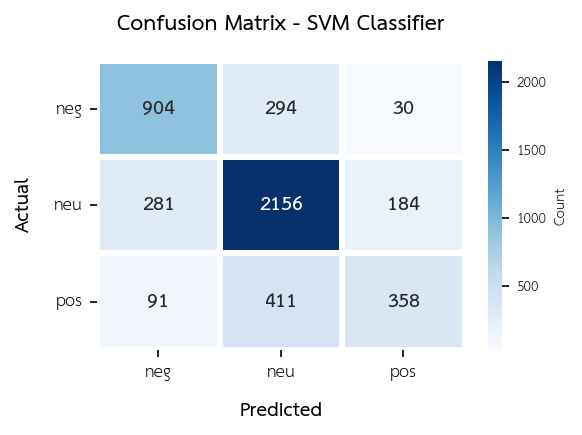

In [53]:
y_pred = svc_clf.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'})

plt.ylabel("Actual", fontsize=13, fontweight='bold', labelpad=10)
plt.xlabel("Predicted", fontsize=13, fontweight='bold', labelpad=10)
plt.title("Confusion Matrix - SVM Classifier", fontsize=15, fontweight='bold', pad=15)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [54]:
print("Results for SVM Classifier:")
print(classification_report(y_test, y_pred, target_names=class_names))

Results for SVM Classifier:
              precision    recall  f1-score   support

         neg       0.71      0.74      0.72      1228
         neu       0.75      0.82      0.79      2621
         pos       0.63      0.42      0.50       860

    accuracy                           0.73      4709
   macro avg       0.70      0.66      0.67      4709
weighted avg       0.72      0.73      0.72      4709

